<a href="https://colab.research.google.com/github/MrNjr01/brain-tumor-prediction/blob/main/brain_tumor_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
brain_tumor_mri_dataset_path = kagglehub.dataset_download('masoudnickparvar/brain-tumor-mri-dataset')

print('Data source import complete.')


100%|██████████| 149M/149M [00:07<00:00, 20.1MB/s]

Extracting files...


Data source import complete.


In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [3]:
DATASET_PATH = brain_tumor_mri_dataset_path

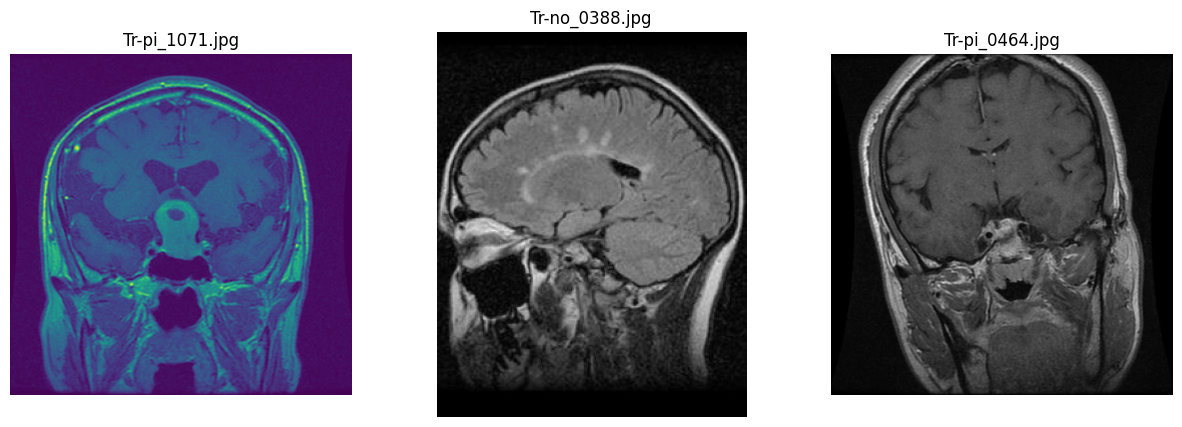

In [24]:
import random

image_paths = []
for subdir, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(subdir, file))

random_image_paths = random.sample(image_paths, 3)

plt.figure(figsize=(15, 5))
for i, img_path in enumerate(random_image_paths):
    plt.subplot(1, 3, i + 1)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
plt.show()


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "Training"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 5143 images belonging to 4 classes.


In [6]:
val_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "Training"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 569 images belonging to 4 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "Testing"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1311 images belonging to 4 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,523,236 (82.10 MB)

 Trainable params: 21,523,236 (82.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 47s 255ms/step - accuracy: 0.8028 - loss: 0.5187 - val_accuracy: 0.7645 - val_loss: 0.6564
Epoch 2/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - accuracy: 0.8211 - loss: 0.4804 - val_accuracy: 0.7750 - val_loss: 0.6913
Epoch 3/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 247ms/step - accuracy: 0.8384 - loss: 0.4386 - val_accuracy: 0.7926 - val_loss: 0.6482
Epoch 4/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 233ms/step - accuracy: 0.8405 - loss: 0.4294 - val_accuracy: 0.7891 - val_loss: 0.6507
Epoch 5/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 246ms/step - accuracy: 0.8561 - loss: 0.3952 - val_accuracy: 0.7979 - val_loss: 0.5934
Epoch 6/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 238ms/step - accuracy: 0.8423 - loss: 0.4251 - val_accuracy: 0.7821 - val_loss: 0.5971
Epoch 7/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 245ms/step - accuracy: 0.8534 - loss: 0.3945 - val_accuracy: 0.8541 - val_loss: 0.5192
Epoch 8/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 39s 233ms/step - accuracy: 0.8488 - loss: 0

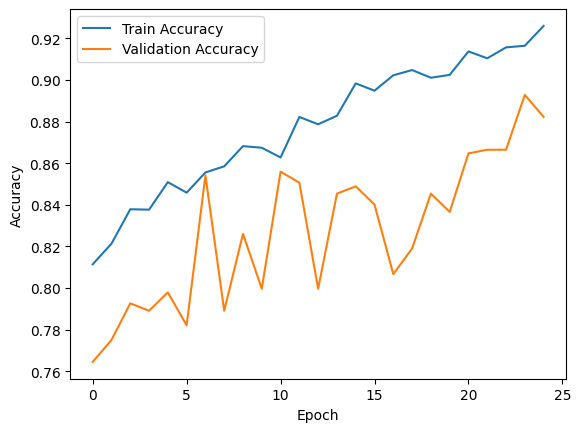

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


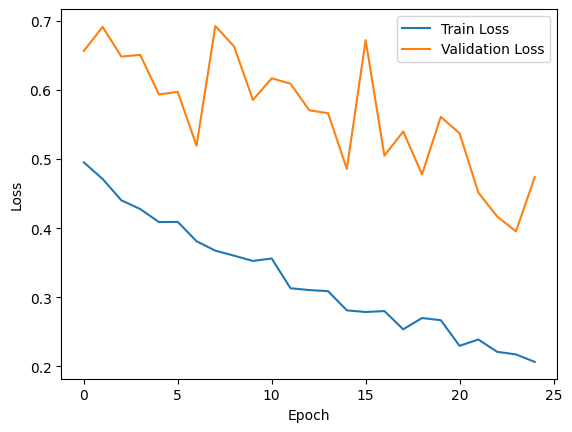

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step


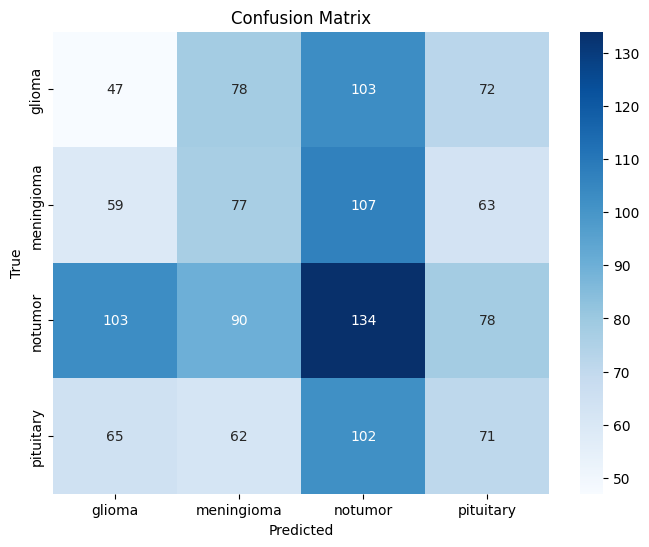

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test data
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Get true labels
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
